In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler





Mounted at /content/drive


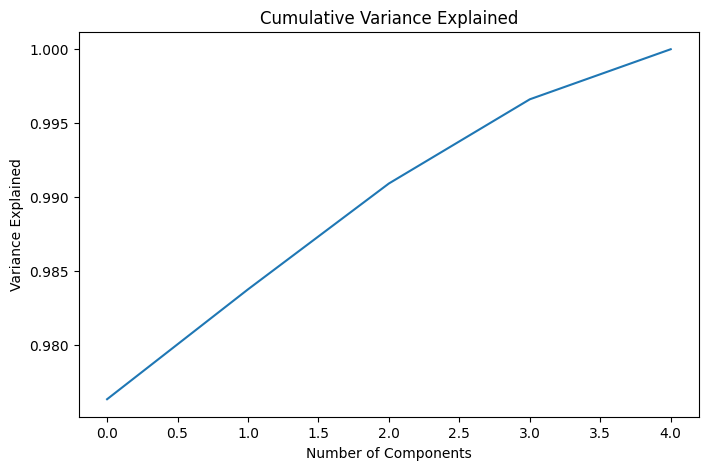

In [3]:


# Load previous
data_path = '/content/drive/My Drive/PGNO-190/preprocessed_after_IT24102676.csv'
df = pd.read_csv(data_path)



# Select only numerical columns for PCA
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_cols.drop('discounted_price')]  # Exclude target
y = df['discounted_price']

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X)

# Create new DataFrame with reduced components and target
df_reduced = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(5)])
df_reduced['discounted_price'] = y

# EDA: Scree plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.savefig('/content/eda_pca_scree.png')
plt.show()



# Save
save_path = '/content/drive/My Drive/PGNO-190/final_preprocessed.csv'
df_reduced.to_csv(save_path, index=False)